In [43]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [44]:
(x_train,y_train),(x_test , y_test) = fashion_mnist.load_data()
classes = ['T-shirt', 'trousers', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']


In [45]:
print(y_train)

[9 0 0 ... 3 0 5]


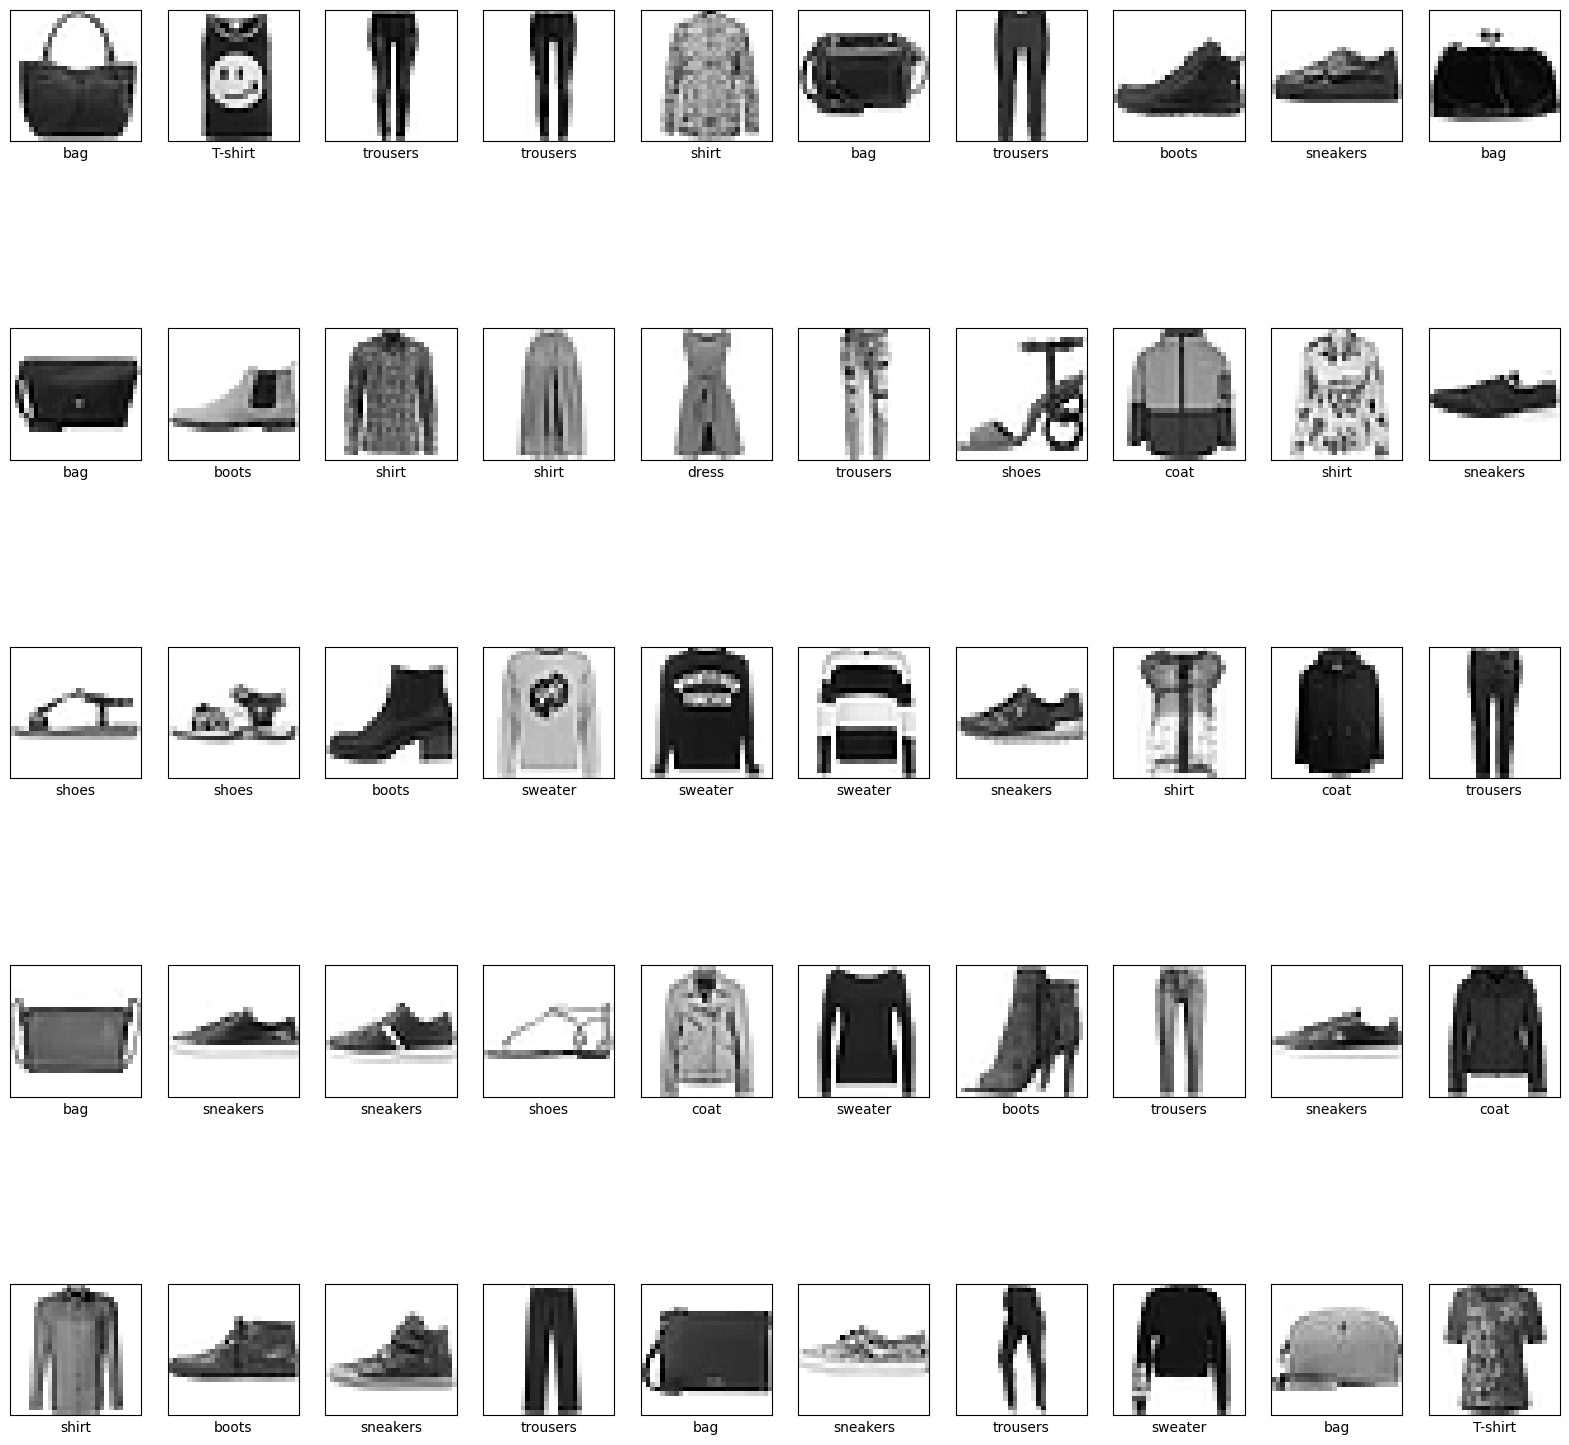

In [46]:
plt.figure(figsize=(20,20))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])


In [6]:
print(x_train.shape)
x_train=x_train.reshape(60000,784)
x_train = x_train/255

(60000, 28, 28)


In [7]:
print(y_train[100])

8


In [8]:
#print(y_train[100])
y_train = utils.to_categorical(y_train, 10)


In [8]:
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
model = Sequential()

model.add(Dense(800,input_dim=784,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
model.fit(x_train,y_train,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5996 - loss: 1.4212
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7616 - loss: 0.7596
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.6560
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.5970
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8221 - loss: 0.5591
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.5429
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.5135
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.5066
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8382 - loss: 0.4895
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.4840


In [12]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [22]:
print(predictions[0])

[6.8410505e-03 7.4858886e-01 2.2279720e-03 2.2481516e-01 1.2896924e-02
 7.3615971e-05 2.8085364e-03 4.3289518e-04 5.6850736e-04 7.4644195e-04]


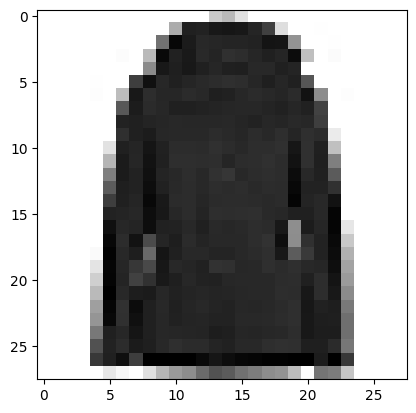

In [24]:
n = 2000


plt.imshow(x_train[n].reshape(28,28),cmap=plt.cm.binary)
plt.show()


In [25]:
classes[np.argmax(predictions[n])]

'пальто'

In [30]:
model.save("Fashion.h5")

In [31]:
from google.colab import files
from PIL import Image



In [36]:
files.upload()

{}

In [37]:
!ls

bam.png  Fashion.h5  sample_data


In [39]:
imagepath = "/content/bam.png"
img=image.load_img(imagepath,target_size=(28,28),color_mode="grayscale")

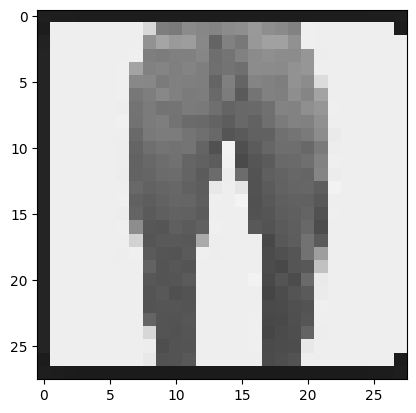

In [40]:
plt.imshow(img.convert("RGBA"))
plt.show()

In [41]:
x = image.img_to_array(img)


#print(x.shape)
x = x.reshape(1,784)
x = (255-x)/255
prediction = model.predict(x)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [42]:
classes[np.argmax(prediction)]

'брюки'